# Unsupervised Learning Project - Part-1

## Automobile Domain

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import and warehouse data

#### Importing JSON dataset

In [2]:
dfJSON = pd.read_json('Part1 - Car-Attributes.json')
dfJSON.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


#### Shape of JSON Dataset

In [3]:
print('Shape of JSON Dataset : ', dfJSON.shape)

Shape of JSON Dataset :  (398, 8)


#### Importing CSV dataset

In [4]:
dfCSV = pd.read_csv('Part1 - Car name.csv')
dfCSV.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


#### Shape of CSV Dataset

In [5]:
print('Shape of CSV Dataset : ', dfCSV.shape)

Shape of CSV Dataset :  (398, 1)


#### Converting JSON dataset to CSV and storing a copy to the working directory

In [6]:
dfJSON.to_csv('Part1 - Car-Attributes.csv', index=None)

#### Merging both the extracted datasets to one dataset

In [7]:
dfJSON = pd.concat([dfJSON,dfCSV],axis=1)
display(dfJSON)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


#### Exporting final data set as CSV, XLSX and JSON for future use

In [8]:
df = dfJSON;
df.to_csv('Final-Car-Data.csv', index = None, header=True)
df.to_excel('Final-Car-Data.xlsx', index = None, header=True)
df.to_json('Final-Car-Data.json')

#### Shape of final data set

In [9]:
df.shape

(398, 9)

## Data Cleansing

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [11]:
df.dtypes.to_frame(name = 'Data Type')

,Data Type
mpg,float64
cyl,int64
disp,float64
hp,object
wt,int64
acc,float64
yr,int64
origin,int64
car_name,object


In [12]:
#null check
df.isnull().any()

mpg         False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
origin      False
car_name    False
dtype: bool

In [13]:
#hp's datatype is object and has null value and so it is expected to have non numeric values/nulls in the dataset
#extracting and printing non numeric values in hp column
hpIsDigit = pd.DataFrame(df.hp.str.isdigit())
df[hpIsDigit['hp'] == False] 

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [14]:
#Replacing all missing values with NaN 
df = df.replace('?', np.nan)
df[hpIsDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [15]:
df.median()

mpg         23.0
cyl          4.0
disp       148.5
hp          93.5
wt        2803.5
acc         15.5
yr          76.0
origin       1.0
dtype: float64

In [16]:
# In order to clean the data either missing value in a row can be dropped or replaced with median. 
#Second approach is chosen in order to retain the other data in the row

df['hp'].fillna((df['hp'].mean()), inplace=True)


# Datatype conversion
df['hp'] = df['hp'].astype('float64')

In [17]:
# Dropping car name and origin attribs since it will not be helpful for this scenario/usecase
df = df.drop(['car_name','origin'], axis=1)
df.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [18]:
df.dtypes.to_frame(name = 'Data Type')

,Data Type
mpg,float64
cyl,int64
disp,float64
hp,float64
wt,int64
acc,float64
yr,int64


In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


## Data analysis & visualisation

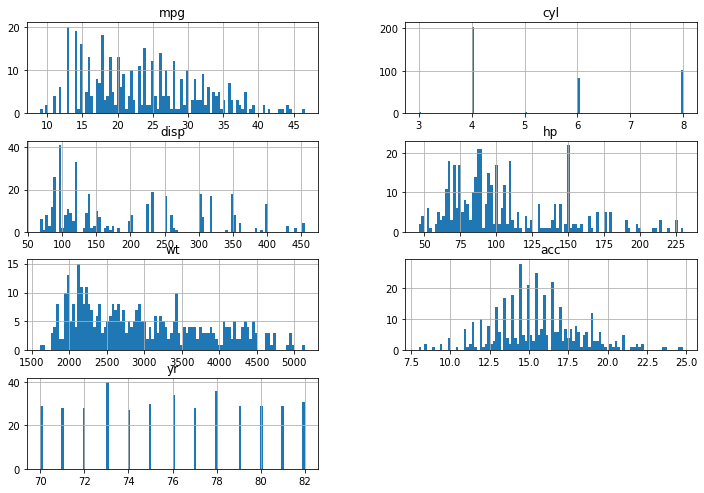

In [20]:
columns = list(df)
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

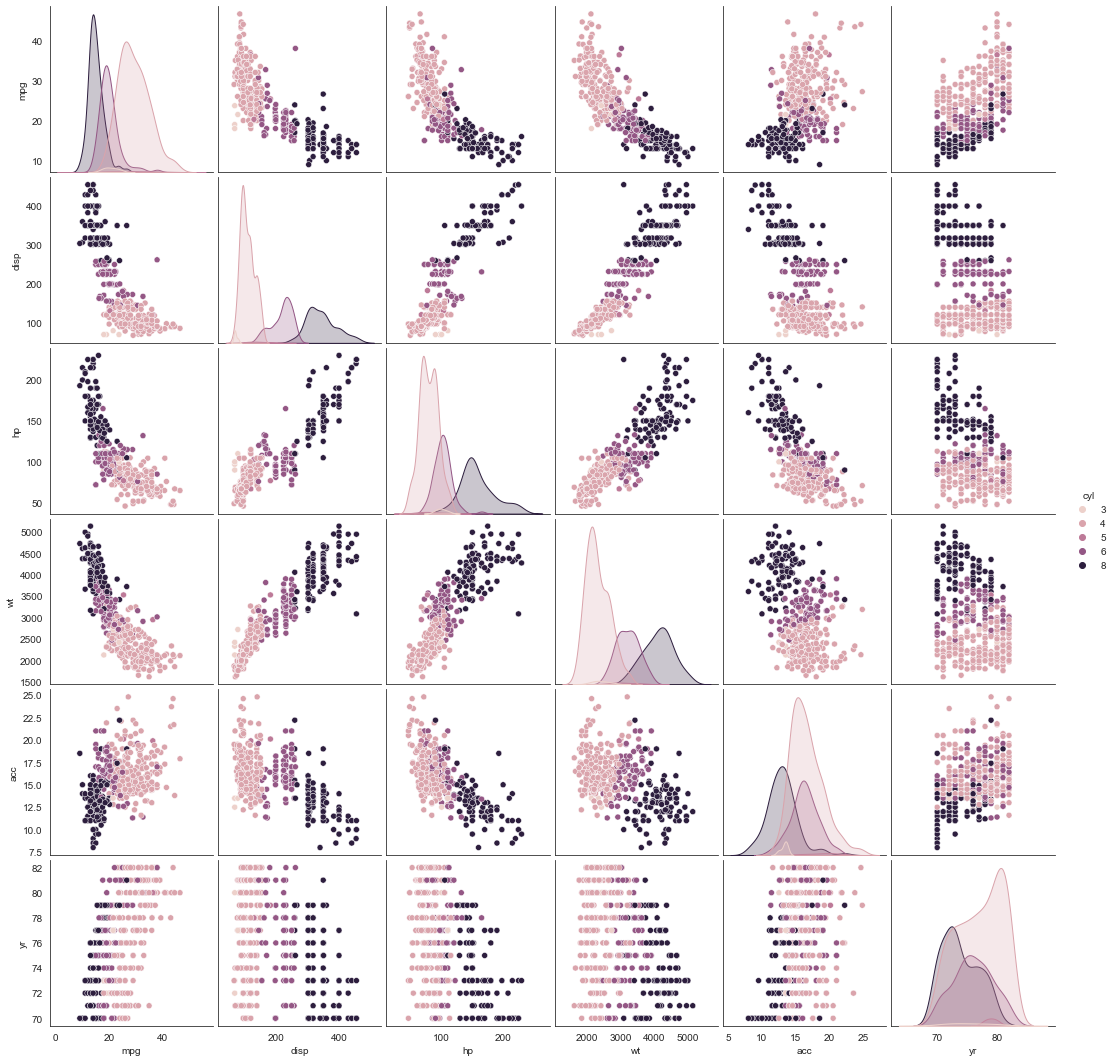

In [21]:
#Bivariate relationships of fields
sns.set_style("white")
sns.pairplot(df, diag_kind='kde', hue='cyl')
plt.show()

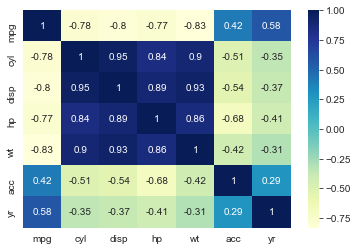

In [22]:
# Plotting the correlation heat map to understand the correlation between variables
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Machine Learning

### K-Means Clustering

In [23]:
#Data standardization using K-Means
from scipy.stats import zscore
XScaledOriginal=df.apply(zscore)
XScaledKmeans = XScaledOriginal;
XScaledHC = XScaledOriginal;
XScaledOriginal.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706439,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426


In [24]:
# K means clustering
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Selecting K with the Elbow Method')

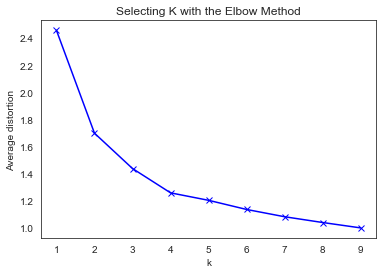

In [26]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
kmeanclustersRange=range(1,10)
kmeanDistortions=[]

for k in kmeanclustersRange:
    model=KMeans(n_clusters=k)
    model.fit(XScaledKmeans)
    prediction=model.predict(XScaledKmeans)
    kmeanDistortions.append(sum(np.min(cdist(XScaledKmeans, model.cluster_centers_, 'euclidean'), axis=1)) / XScaledKmeans.shape[0])


plt.plot(kmeanclustersRange, kmeanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting K with the Elbow Method')

In [27]:
kmean_clusters_df = pd.DataFrame( { "num of clusters":kmeanclustersRange, "distortion": kmeanDistortions  } )
kmean_clusters_df[0:10]

,num of clusters,distortion
0,1,2.458102
1,2,1.696444
2,3,1.434869
3,4,1.254956
4,5,1.199665
5,6,1.131931
6,7,1.078040
7,8,1.035382
8,9,0.995479


###### From the elbow plot 2 and 4 are the elbow points observed

In [28]:
# K mean clustering with K = 2
k2_final_model=KMeans(n_clusters = 2,random_state=0)
k2_final_model.fit(XScaledKmeans)
k2_prediction=k2_final_model.predict(XScaledKmeans)

#Append the prediction 
df["GROUP"] = k2_prediction
XScaledKmeans["GROUP"] = k2_prediction
print("Groups Assigned : \n")
df.head(15)

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
5,15.0,8,429.0,198.0,4341,10.0,70,1
6,14.0,8,454.0,220.0,4354,9.0,70,1
7,14.0,8,440.0,215.0,4312,8.5,70,1
8,14.0,8,455.0,225.0,4425,10.0,70,1
9,15.0,8,390.0,190.0,3850,8.5,70,1


#### Visualizing the distribution with Box plot

In [29]:
kmeanClusterWithThree = df.groupby(['GROUP'])
kmeanClusterWithThree.mean()

,mpg,cyl,disp,hp,wt,acc,yr
GROUP,,,,,,,
0,26.619113,4.569966,140.250853,85.286063,2567.860068,16.535836,76.822526
1,14.851429,7.923810,341.809524,158.000000,4093.771429,12.867619,73.742857


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

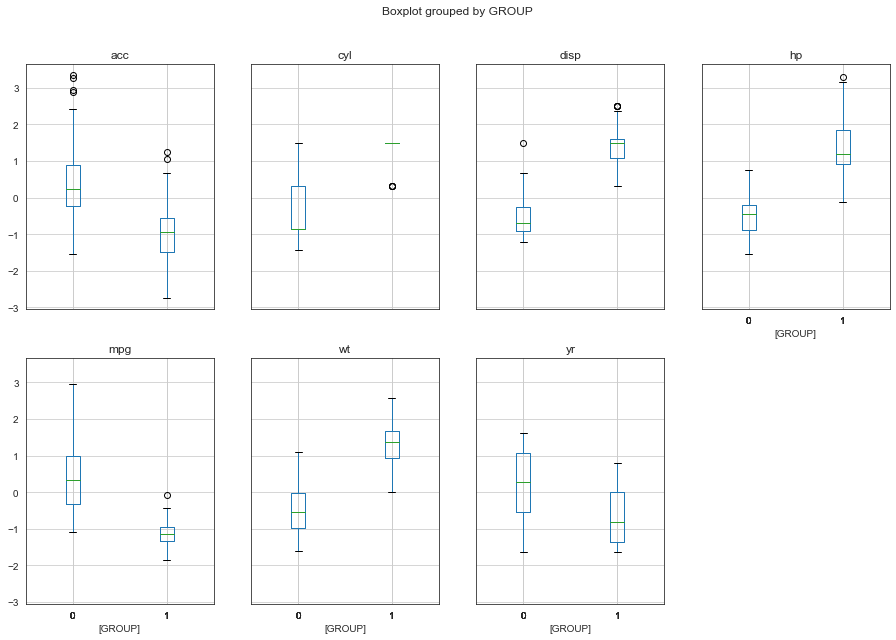

In [30]:
XScaledKmeans.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

### Cluster evaluation with the silhouette score

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [32]:
# Calculating silhouette_score for K=2
labels = k2_final_model.labels_
silhouette_score(XScaledKmeans,labels)

0.49681974856131655

In [33]:
# K mean clustering with K = 4
k4_final_model=KMeans(n_clusters = 4,random_state=0)
k4_final_model.fit(XScaledKmeans)
k4_prediction=k4_final_model.predict(XScaledKmeans)

#Append the prediction 
df["GROUP"] = k4_prediction
XScaledKmeans["GROUP"] = k4_prediction
print("Groups Assigned : \n")
df.head(15)

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
5,15.0,8,429.0,198.0,4341,10.0,70,1
6,14.0,8,454.0,220.0,4354,9.0,70,1
7,14.0,8,440.0,215.0,4312,8.5,70,1
8,14.0,8,455.0,225.0,4425,10.0,70,1
9,15.0,8,390.0,190.0,3850,8.5,70,1


In [34]:
kmeanClusterWithFour = df.groupby(['GROUP'])
kmeanClusterWithFour.mean()

,mpg,cyl,disp,hp,wt,acc,yr
GROUP,,,,,,,
0,25.244554,3.970297,108.272277,82.984845,2322.900990,16.455446,73.762376
1,14.528866,7.979381,348.020619,161.804124,4143.969072,12.641237,73.628866
2,32.836036,4.054054,112.153153,76.359257,2323.189189,16.627027,80.162162
3,19.719101,6.134831,222.932584,101.421004,3233.449438,16.430337,75.977528


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

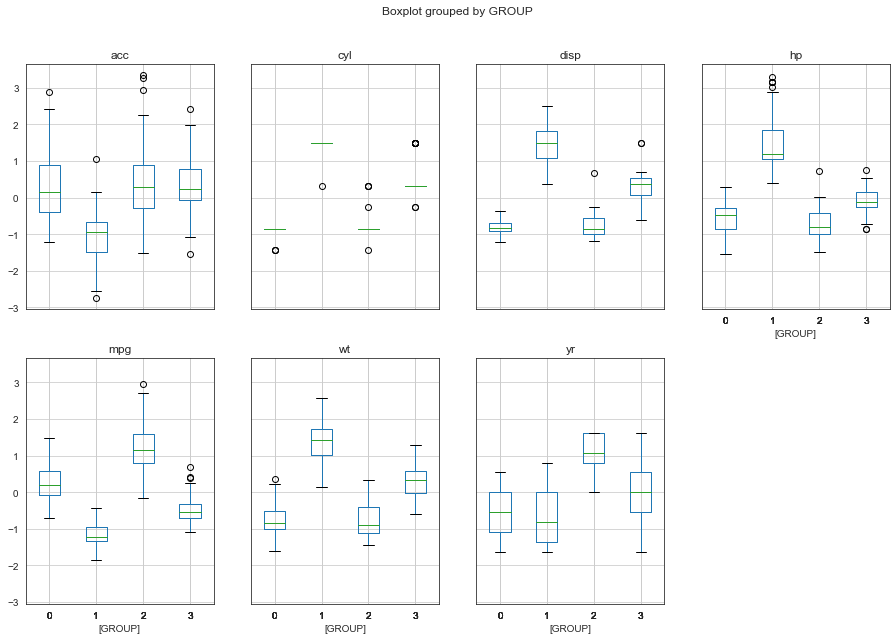

In [35]:
XScaledKmeans.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

### Cluster evaluation with the silhouette score

In [36]:
# Calculating silhouette_score for K=4
labels = k4_final_model.labels_
silhouette_score(XScaledKmeans,labels)

0.4834453377218953

### Comparing the silhouette scores 2 clusters are better than 4 clusters

### So 2 clusters will be the best fit for this dataset

## Hierarchical clustering

In [37]:
from sklearn.cluster import AgglomerativeClustering 

In [38]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
model.fit(XScaledHC)

AgglomerativeClustering(linkage='average')

In [39]:
dfAttrib=df.iloc[:,0:7]
dfAttrib.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [40]:
dfAttrib['labels'] = model.labels_
dfAttrib.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,labels
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
5,15.0,8,429.0,198.0,4341,10.0,70,1
6,14.0,8,454.0,220.0,4354,9.0,70,1
7,14.0,8,440.0,215.0,4312,8.5,70,1
8,14.0,8,455.0,225.0,4425,10.0,70,1
9,15.0,8,390.0,190.0,3850,8.5,70,1


In [41]:
hcCluster = dfAttrib.groupby(['labels'])

In [42]:
hcCluster.mean()

,mpg,cyl,disp,hp,wt,acc,yr
labels,,,,,,,
0,26.410299,4.641196,143.606312,85.992745,2592.239203,16.511296,76.777409
1,14.528866,7.979381,348.020619,161.804124,4143.969072,12.641237,73.628866


In [43]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
#Pairwise distribution between data points
from scipy.spatial.distance import pdist

In [45]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(XScaledHC, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(XScaledHC))

c

0.8311768304023399

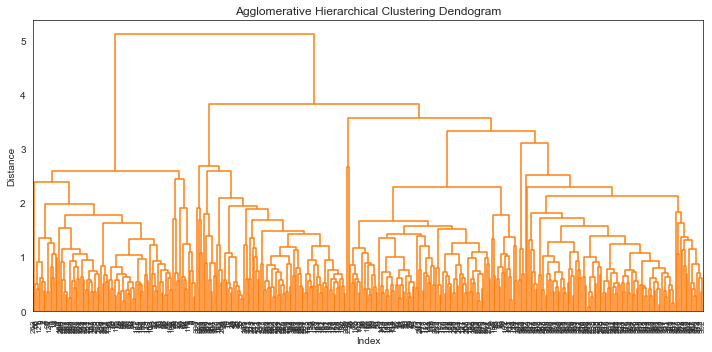

In [46]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

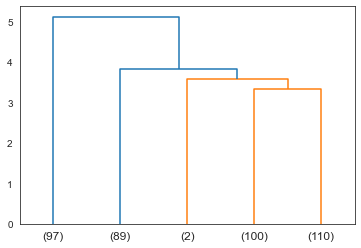

In [47]:
#Visualizing last 5 clusters
dendrogram(Z,truncate_mode='lastp',p=5,)
plt.show()